In [8]:
                    #--------------PORTER DELIVERY TIME ESTIMATION USING MACHINE LEARNING------#
                                       #--------------Import Libraries-----------#


#--------------PORTER DELIVERY TIME ESTIMATION USING MACHINE LEARNING------#
#--------------Import Libraries-----------#

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import __version__ as sklearn_version  # Import sklearn version correctly

import warnings
warnings.filterwarnings("ignore")

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)  # Now correctly accessing matplotlib.__version__
print("seaborn:", sns.__version__)
print("sklearn:", sklearn_version)  # Use the imported version

pandas: 2.2.2
numpy: 1.26.4
matplotlib: 3.8.4
seaborn: 0.13.2
sklearn: 1.4.2


In [9]:
                                            #--------------Load Dataset-----------#

df = pd.read_csv("dataset.csv")
df.head()


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [10]:
                                               #------Basic Data Understanding----------#

df.shape


(197428, 14)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [12]:
df.isnull().sum()


market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [13]:
                           #-----------------Target Variable Creation (Delivery Time)-----------------#
#-----------------Target Variable Creation (Delivery Time)-----------------#
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df['delivery_time'] = (
    df['actual_delivery_time'] - df['created_at']
).dt.total_seconds() / 60


In [14]:
df['delivery_time'].describe()


count    197421.000000
mean         48.470956
std         320.493482
min           1.683333
25%          35.066667
50%          44.333333
75%          56.350000
max      141947.650000
Name: delivery_time, dtype: float64

In [15]:
                                 #-----------------Data Cleaning-----------------#
df = df[df['delivery_time'] > 0]
df = df[df['delivery_time'] < 200]


In [16]:
                                #-------------Select only required columns-------#
features = [
    "total_items",
    "subtotal",
    "num_distinct_items",
    "min_item_price",
    "max_item_price",
    "total_onshift_partners",
    "total_busy_partners",
    "total_outstanding_orders"
]

df = df[features + ["delivery_time"]]


In [17]:
df = df.fillna(df.median())


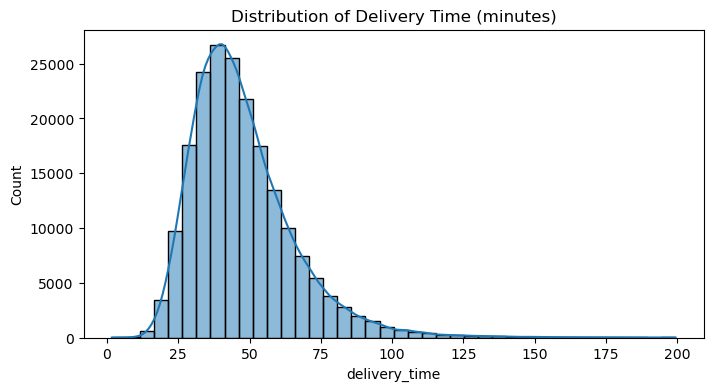

In [18]:
                    #---------------------Exploratory Data Analysis (EDA)----------------------#
                    #--------------------- Distribution of Delivery Time ----------------------#

plt.figure(figsize=(8,4))
sns.histplot(df['delivery_time'], bins=40, kde=True)
plt.title("Distribution of Delivery Time (minutes)")
plt.show()


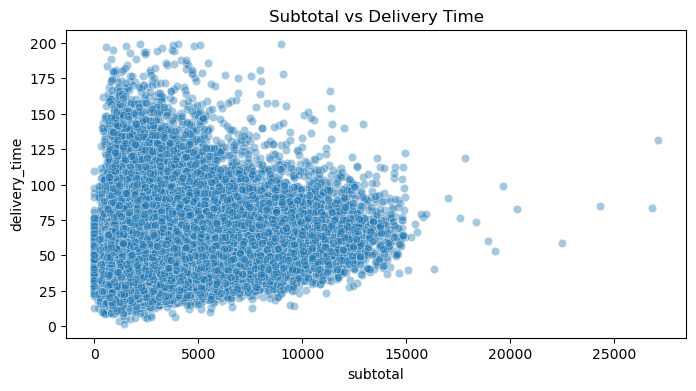

In [19]:
                    #------------Subtotal vs Delivery Time------------#
plt.figure(figsize=(8,4))
sns.scatterplot(x='subtotal', y='delivery_time', data=df, alpha=0.4)
plt.title("Subtotal vs Delivery Time")
plt.show()


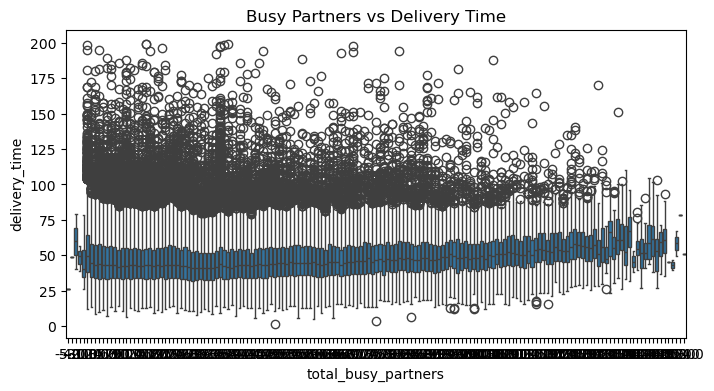

In [20]:
                             #------------Busy Partners vs Delivery Time------------#
plt.figure(figsize=(8,4))
sns.boxplot(x='total_busy_partners', y='delivery_time', data=df)
plt.title("Busy Partners vs Delivery Time")
plt.show()


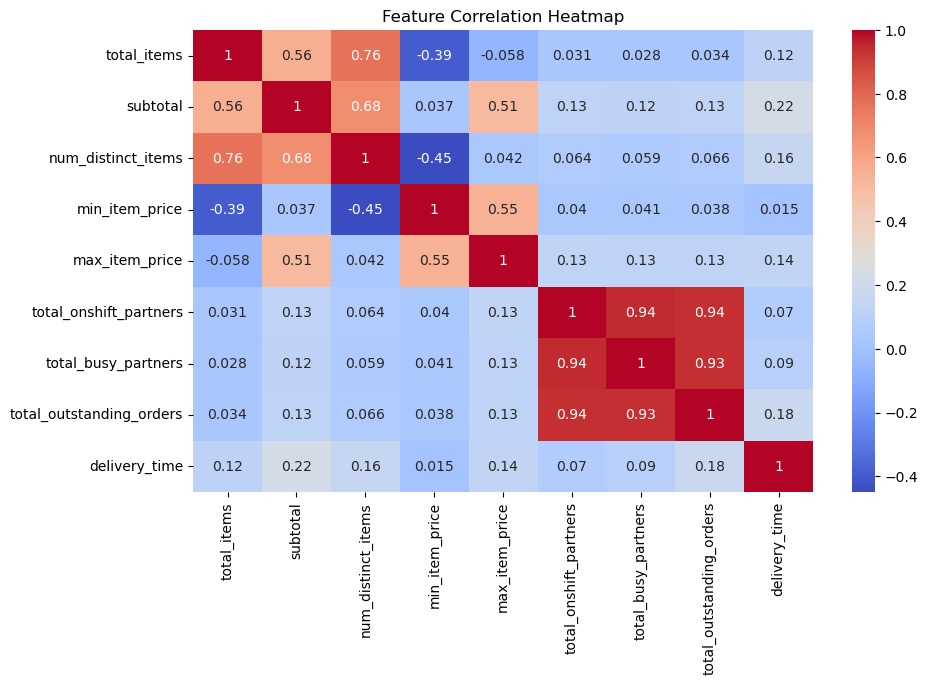

In [21]:
                                 #------------Correlation Heatmap------------#
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [22]:
                                      #-----------Feature Engineering (IMPORTANT)------------#
# Order complexity
df['order_size'] = df['total_items'] / df['num_distinct_items']

# Partner load
df['partner_load'] = (
    df['total_busy_partners'] / df['total_onshift_partners']
)

# Handle divide-by-zero
df.replace([np.inf, -np.inf], 0, inplace=True)


In [23]:
                                      #-----------Final Feature Set------------#
X = df.drop('delivery_time', axis=1)
y = df['delivery_time']


In [24]:
                                      #-----------Train-Test Split------------#
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [25]:
                                      #-----------Train Tuned Random Forest Model------------#
rf_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=20,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=400,
                      n_jobs=-1, random_state=42)

In [26]:
                                      #-----------Model Evaluation------------#
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) in minutes:", mae)



Mean Absolute Error (MAE) in minutes: 11.828370926024874


In [27]:
                                      #-----------Feature Importance------------#
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


subtotal                    0.210336
total_outstanding_orders    0.198514
partner_load                0.126091
total_busy_partners         0.113635
max_item_price              0.105232
min_item_price              0.099550
total_onshift_partners      0.092426
order_size                  0.021040
num_distinct_items          0.016705
total_items                 0.016472
dtype: float64

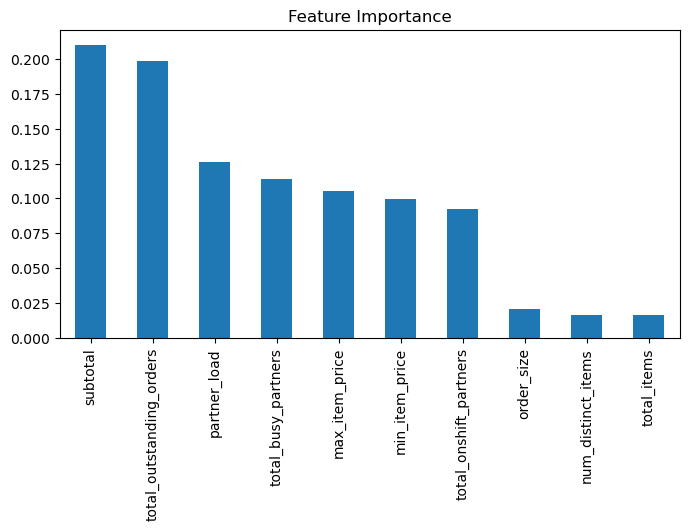

In [28]:
                                      #-----------Feature Importance Visualization------------#
plt.figure(figsize=(8,4))
feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()


In [29]:
                                      #-----------Test with Custom Input------------#
test_input = {
    "total_items": 3,
    "subtotal": 4200,
    "num_distinct_items": 3,
    "min_item_price": 1200,
    "max_item_price": 1800,
    "total_onshift_partners": 5,
    "total_busy_partners": 3,
    "total_outstanding_orders": 7,
    "order_size": 1.0,
    "partner_load": 0.6
}

test_df = pd.DataFrame([test_input])

prediction = rf_model.predict(test_df)
print("Predicted Delivery Time (minutes):", prediction[0])


Predicted Delivery Time (minutes): 47.79249529089656
